In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel(r'D:\Full project\Annual.xlsx')
mm=pd.read_excel(r'D:\Full project\Annual.xlsx')
df=df.drop(['SC Name','Marketing Model','Brand'], axis=1)
df['SC Code'] = df['SC Code'].apply(lambda x: x.split('-')[1])
df['Internal Model'] = df['Internal Model'].apply(lambda x: x[3:-2] if isinstance(x, str) and len(x) > 5 else x)
ts=pd.read_excel(r'D:\Full project\EG Inspection Order Report.xlsx')
ts=ts.drop(['SC Name','Marketing Model','Brand'], axis=1)
ts['SC Code'] = ts['SC Code'].apply(lambda x: x.split('-')[1])
ts['Model'] = ts['Model'].apply(lambda x: x[3:-2] if isinstance(x, str) and len(x) > 5 else x)
cs=pd.read_excel(r'D:\Full project\Cancel Service Repair Order report (1).xlsx')
cs=cs.drop(['SC Name','Marketing Model','Brand'], axis=1)
cs['SC Code'] = cs['SC Code'].apply(lambda x: x.split('-')[1])
cs['Internal Model'] = cs['Internal Model'].apply(lambda x: x[3:-2] if isinstance(x, str) and len(x) > 5 else x)
ro=pd.read_excel(r'D:\Full project\Repair Order_RO Change Report (2).xlsx')
ro=ro.drop(['SC Name','Marketing Model','Brand'], axis=1)
ro['SC Code'] = ro['SC Code'].apply(lambda x: x.split('-')[1])
ro['Model'] = ro['Model'].apply(lambda x: x[3:-2] if isinstance(x, str) and len(x) > 5 else x)
ap=pd.read_excel(r'D:\Full project\Repair Work Order Appeal (3).xlsx')
ap=ap.drop(['SC Name','Marketing Model','Brand'], axis=1)
ap['SC Code'] = ap['SC Code'].apply(lambda x: x.split('-')[1])
ap['Internal Model'] = ap['Internal Model'].apply(lambda x: x[3:-2] if isinstance(x, str) and len(x) > 5 else x)

In [139]:
df.head()

,Repair Order No.,Region,SC Code,Order Status,Handle Method,RV Status,Repair type,Used Warranty Service Category,Internal Model,Color,...,Order Type,Accessory Product,Sales Order for Accessories,Original RO No.,Whether the system automatically closes the order or not,Dealer Remark,Source,User phone (anonymized),Service Content,Manual Fee
0,EG01-009R231201002,EG,009,Handovered,Normal Repair,Under RV Process,Upgrade,NaN,1907,Ocean Blue,...,Phone,NaN,NaN,NaN,NaN,NaN,SC,efac74f0891d7598149751f9a0cdffb199189ca135db80...,NaN,0
1,EG01-003R231201001,EG,003,Handovered,Normal Repair,Under RV Process,OOW,NaN,2159,Fantasy Silver,...,Phone,NaN,NaN,NaN,NaN,NaN,SC,112f2f3203e6a8ed1e7c7c1ef05adcbfff975965b58a43...,NaN,0
2,EG01-024R231201002,EG,024,Handovered,Normal Repair,Under RV Process,OOW,NaN,1923,Red,...,Phone,NaN,NaN,NaN,NaN,NaN,WCSM APP,3e21170a4a1a49d35eade9e02f6dfc9f545988b304dfce...,NaN,0
3,EG01-024R231201001,EG,024,Handovered,Normal Repair,Under RV Process,OOW,NaN,2159,Fantasy Silver,...,Phone,NaN,NaN,NaN,NaN,NaN,WCSM APP,4ee64bcc416c4c88c2be86d3446d3471a5974d9ea4cd17...,NaN,0
4,EG01-024R231201001,EG,024,Handovered,Normal Repair,Under RV Process,OOW,NaN,2159,Fantasy Silver,...,Phone,NaN,NaN,NaN,NaN,NaN,WCSM APP,4ee64bcc416c4c88c2be86d3446d3471a5974d9ea4cd17...,NaN,0


In [140]:
ts.head()

,Region Code,Inspection Order No.,Original Inspection Order No.,SC Code,Inspection Type,Exchange Cause,Submission Category,Submission Method,Order Type,Dealer Name,...,Remark,Material code,Material type,Material name,Discount,Receivable,Net charge,Dealer Remark,Cota Operator,User phone (anonymized)
0,EG,EG01-004I220223001,NaN,004,NaN,NaN,Customer,On site,IoT,NaN,...,Transfer to inspection,NaN,NaN,NaN,0,0,0,NaN,NaN,78c38a0026a612e9fd236858474aaf5ce851c6bff60958...
1,EG,EG01-002I230503001,NaN,002,NaN,NaN,Salesman,On site,IoT,NaN,...,السماعه لا تتصل,NaN,NaN,NaN,0,0,0,NaN,NaN,0d0b239d04fa490c20003cb281de380090a1a0af04f730...
2,EG,EG01-006I231203001,NaN,006,NaN,NaN,Customer,On site,IoT,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,703be41f1bd0ef54bc672adf4b9703584fba69ca67f4ff...
3,EG,EG01-009I221120001,NaN,009,NaN,NaN,Customer,On site,IoT,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,aa3dd72395992fc85aea3255619fcf9d369d7b389c1c5c...
4,EG,EG01-009I220907001,NaN,009,NaN,NaN,Customer,On site,IoT,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,896d9dd9aec38d08933e4215d3039535da1ca9b9953e8b...


In [141]:
cs.head()

,Repair Order No.,Region,SC Code,Repair type,Internal Model,Submission Category,Submission Method,Date Of Manufacture,Registration date,Purchase Date,...,Solution,Cancelling Cause,Cancel remark,Good Material Code,Good material name,Good Material Subcategory,Local currency,Unit Price,Order Type,Source
0,EG01-008R231130023,EG,008,OOW,2481MEA,Customer,On site,2023-03-11,2023-06-25,2023-06-25,...,Cancel Service,Others,سوكت الشاحن مكسور .. العميل يريد معرفه سعر سوك...,NaN,NaN,NaN,EGP,NaN,Phone,SC
1,EG01-002R231130011,EG,002,OOW,1803,Customer,On site,2019-01-05,2020-08-05,2020-08-05,...,Cancel Service,Others,بعد الفحص تبين ان الجهاز يحتاج الي بورده,NaN,NaN,NaN,EGP,NaN,Phone,SC
2,EG01-014R231130004,EG,014,OOW,1803,Customer,On site,2018-09-22,2018-10-20,2018-10-20,...,Cancel Service,Spare parts are too expensive,--Engineer Remark الجهاز خارج فتره الضمان وال...,4901686.0,Mainboard assembly A3s 18303 2+16G Black Purpl...,Mainboard,EGP,3640.0,Phone,SC
3,EG01-008R231130010,EG,008,OOW,2043,Customer,On site,NaN,NaN,2000-01-01,...,Cancel Service,Others,العميل يريد معرفه سعر الشاشه,NaN,NaN,NaN,EGP,NaN,Phone,SC
4,EG01-008R231130009,EG,008,OOW,2185,Customer,On site,2021-05-11,2021-07-15,2021-07-15,...,Cancel Service,Others,العميل طلب استلام الهاتف وعدم تركه للفحص,NaN,NaN,NaN,EGP,NaN,Phone,SC


In [142]:
ro.head()

,Region,SC Code,Repair Order No.,Order Status,Repair type,Submission Category,Submission Method,RV Status,RV Date,Model,...,Solution,Receiver,Engineer,Change Cause,Change Order Content,Changing Details,Applied By,Change order person,Submit time for change,Complete time for change
0,EG,002,EG01-002R231105019,Handovered,OOW,Customer,On site,RV Finished,2023/11/13 17:14:55,2159,...,Material Replacement,mahmoud samy ibrahim,mahmoud samy ibrahim,kindly modify payment method from cash to be Pos,"Solution,Others",kindly modify payment method from cash to be Pos,Ashraf mohsen elkotb,noha yasser mohamed taher,2023/11/7 19:41:05,2023/11/8 11:24:38
1,EG,002,EG01-002R231018020,Handovered,OOW,Customer,On site,RV Finished,2023/10/31 18:50:55,2325,...,Clean,Ashraf mohsen elkotb,Emad Saad Faam Soryal Nasr,Kindly change fault phenomenon from Forget loc...,"Material information,Fault data,Others",Kindly change fault phenomenon from Forget loc...,Emad Saad Faam Soryal Nasr,Adel youssef mahmoud Ahmed,2023/10/19 15:37:10,2023/10/19 16:37:24
2,EG,002,EG01-002R231016009,Handovered,OOW,Customer,On site,RV Finished,2023/11/6 12:42:50,2121,...,Material Replacement,Emad Saad Faam Soryal Nasr,mahmoud samy ibrahim,need form Request to upgrade software(SW1) and...,Fault data,need form Request to upgrade software(SW1) and...,mahmoud samy ibrahim,Adel youssef mahmoud Ahmed,2023/10/29 16:51:09,2023/10/29 17:05:06
3,EG,002,EG01-002R230927006,Handovered,OOW,Customer,On site,RV Finished,2023/10/11 4:48:38,2159,...,Material Replacement,Ahmed Samir Mahmoud Radwan Ali,mahmoud samy ibrahim,need to add Service Content (Regulate Authoriz...,"Remark,Others",need to add Service Content (Regulate Authoriz...,Ahmed Samir Mahmoud Radwan Ali,Adel youssef mahmoud Ahmed,2023/9/27 18:53:28,2023/10/1 9:45:14
4,EG,002,EG01-002R230918014,Handovered,OOW,Customer,On site,RV Finished,2023/10/2 17:19:48,2159,...,Material Replacement,Emad Saad Faam Soryal Nasr,Emad Saad Faam Soryal Nasr,need to add in remark (the customer came witho...,Remark,need to add in remark (the customer came witho...,Emad Saad Faam Soryal Nasr,Adel youssef mahmoud Ahmed,2023/9/27 16:43:32,2023/9/27 17:12:54


In [143]:
ap.head()

,Repair Order No.,Region,SC Code,Submission Category,Repair type,RV Status,RV Date,Internal Model,Dealer Name,Dealer Phone No.,...,Original Judgement Result,Original Judgement Cause,Original RV Remark,Whether change RO?,Fault Phenomenon Code,Fault Phenomenon Name,Fault Cause Code,Fault Cause,Solution,Appeal Cause
0,EG01-019R231126036,EG,019,Customer,OOW,RV Finished,2023-12-03,2325,NaN,NaN,...,NaN,NaN,NaN,No,MT3,Receiver low volume,JHC7,Dust or foreign matter in Receiver's Dust-proo...,Clean,"as per attached ,RO with customer signature , ..."
1,EG01-004R231122011,EG,004,Customer,OOW,RV Finished,2023-11-30,2239,NaN,NaN,...,NaN,NaN,NaN,No,MT3,Receiver low volume,JHC7,Dust or foreign matter in Receiver's Dust-proo...,Clean,按照附加的用户签名工单电话号码是对的
2,EG01-004R231122011,EG,004,Customer,OOW,RV Finished,2023-11-30,2239,NaN,NaN,...,NaN,NaN,NaN,No,SPK3,Loudspeaker low volume,JHC8,Dust or foreign matter in Speaker's Dust-proof...,Clean,按照附加的用户签名工单电话号码是对的
3,EG01-026R231119047,EG,026,Customer,OOW,RV Finished,2023-11-28,2251,NaN,NaN,...,NaN,NaN,NaN,No,SCA7,Smartphone gets dust,JHC4,Dust or foreign matter in USB port,Clean,"as per attached ,RO with customer signature , ..."
4,EG01-026R231119045,EG,026,Customer,OOW,RV Finished,2023-11-26,2185,NaN,NaN,...,NaN,NaN,NaN,No,SCA7,Smartphone gets dust,JHC4,Dust or foreign matter in USB port,Clean,"as per attached ,RO with customer signature , ..."


In [144]:
df1 = df.copy()
df1 = df1[df1['Handle Method'] != 'Cancel Service']
df1 = df1.drop_duplicates(subset=['Repair Order No.'])
df1 = df1[['Repair Order No.','SC Code','Repair type','Solution','Good Material Subcategory','Handover Date']]
df1['Handover Date'] = pd.to_datetime(df1['Handover Date'])
df1['month'] = df1['Handover Date'].dt.strftime("%B")
df1['HS'] = 'Hard'
df1.loc[(df1['Repair type'] == 'Upgrade') | (df1['Solution'] == 'Clean'), 'HS'] = 'Soft'

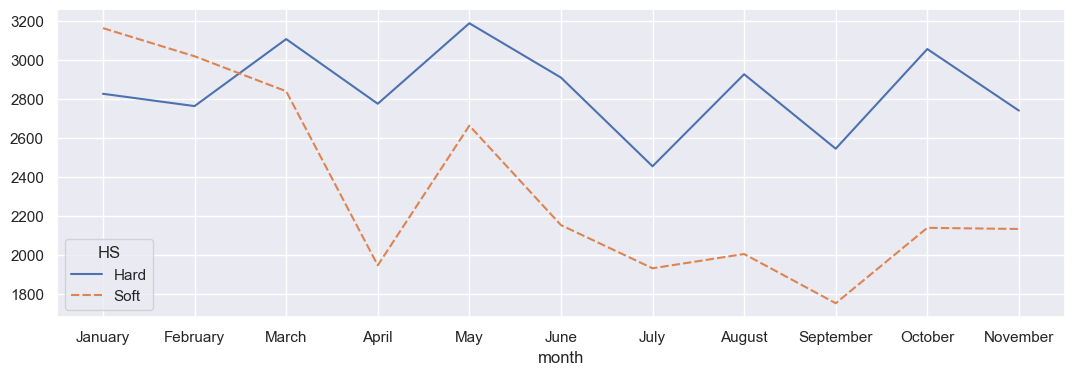

In [145]:
pt = df1.pivot_table(values='Repair Order No.', index='month', columns='HS', aggfunc='count')
pt = pt.reset_index()
pt['month'] = pd.Categorical(pt['month'], ordered=True, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
pt = pt.sort_values(by='month')
pt.set_index(['month'], inplace=True)
sns.set(style="darkgrid")
plt.figure(figsize=(13,4))
sns.lineplot(pt)
plt.show()

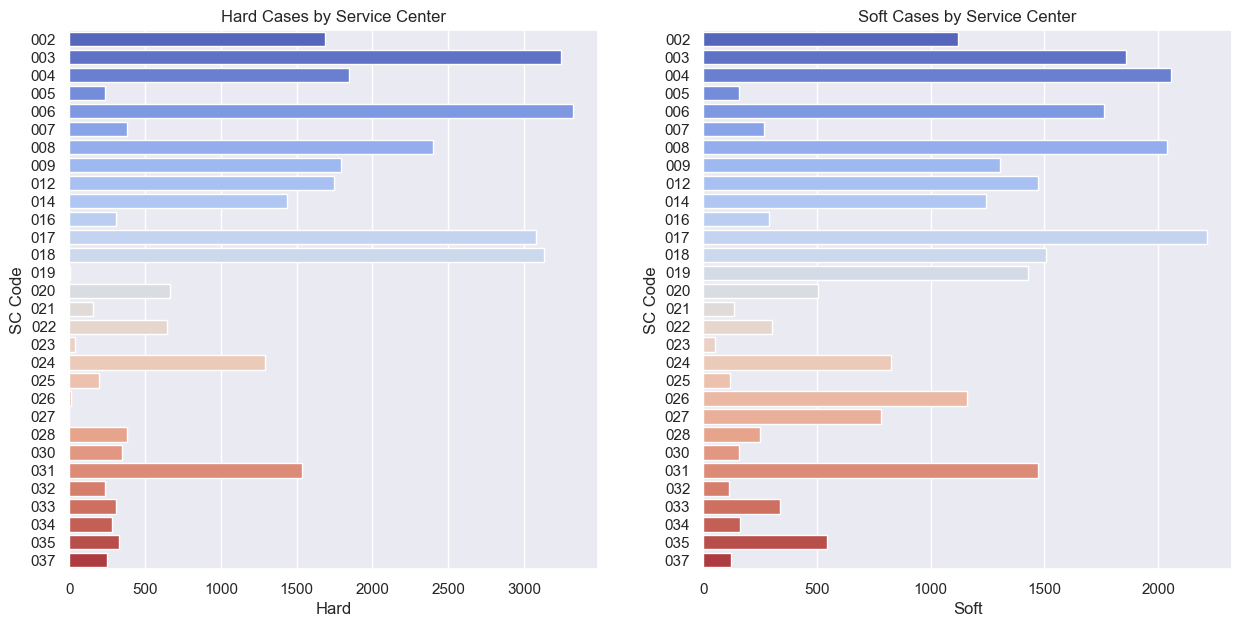

In [146]:
pt2 = df1.pivot_table(values='Repair Order No.', index='SC Code', columns='HS', aggfunc='count')
pt2 = pt2.reset_index()
pt2.set_index(['SC Code'], inplace=True)
pt2=pt2.reset_index()
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].set_title('Hard Cases by Service Center')
sns.barplot(x="Hard", y="SC Code", hue="SC Code", data=pt2, ax=axs[0], palette='coolwarm')
axs[1].set_title('Soft Cases by Service Center')
sns.barplot(x="Soft", y="SC Code", hue="SC Code", data=pt2, ax=axs[1], palette='coolwarm')
plt.show()

In [183]:
#iw= In Warrenty
iw=df.loc[df['Repair type'].isin(['IW'])]
iw=iw[['SC Code','Internal Model','Repair Order No.','Handle Method','Handover Date','Repair type','Order Type','Submission Category',
       'Solution','Good Material Code','Good Material Subcategory']]

#oow = Out Of warenty
oow=df.loc[df['Repair type'].isin(['OOW'])]
oow=oow[['Handle Method','Repair type','Order Type','Handover Date','Submission Category',
         'Solution','Good Material Code','Good Material Subcategory']]
#mm=Marketing Models (New Model)
mm=mm.loc[mm['Internal Model'].str.contains('CPH2505')|mm['Internal Model'].str.contains('CPH2521')|
       mm['Internal Model'].str.contains('CPH2481')|mm['Internal Model'].str.contains('CPH2525')|
       mm['Internal Model'].str.contains('CPH2565')|mm['Internal Model'].str.contains('CPH2577')|
      mm['Internal Model'].str.contains('CPH2529')|mm['Internal Model'].str.contains('CPH2557')|
      mm['Internal Model'].str.contains('CPH2385')|mm['Internal Model'].str.contains('CPH2387')|
      mm['Internal Model'].str.contains('CPH2477')|mm['Internal Model'].str.contains('CPH2471')]
mm=mm[['Repair Order No.','SC Code','Handle Method','Repair type','Internal Model','Handover Date','Submission Category','Solution','Good Material Code',
       'Good Material Subcategory']]
mm['SC Code'] = mm['SC Code'].apply(lambda x: x.split('-')[1])
mm['Internal Model'] = mm['Internal Model'].apply(lambda x: x[3:-2] if isinstance(x, str) and len(x) > 5 else x)
#uc=Upgrade & Clean (not material )
uc=df.loc[df['Solution']!='Material Replacement']
#mr= Material Replacement (have been replaced)
mr=df.loc[df['Solution']=='Material Replacement']
#io=Watches & Headphone
io=df[['Repair Order No.','Internal Model','Handle Method','Repair type','Handover Date','Order Type','Submission Category','Solution',
       'Good Material Code','Good Material Subcategory']]
io=io.loc[io['Order Type']!='Phone']
#sc=Not a customer or dealer
sc=df.loc[df['Submission Category']!='Customer']
sc=sc[['Handle Method','Repair type','Order Type','Handover Date','Submission Category','Solution',
       'Good Material Code','Good Material Subcategory']]
#ts= replaced device
ts=ts[['Inspection Order No.','Inspection Type','Submission Category','Order Type']]
ts=ts.drop_duplicates('Inspection Order No.')
ts=ts.loc[ts['Inspection Type']=='Special Exchange']
#cs=Cancel Service
cs=cs[['Cancelling Cause','Cancel remark']]

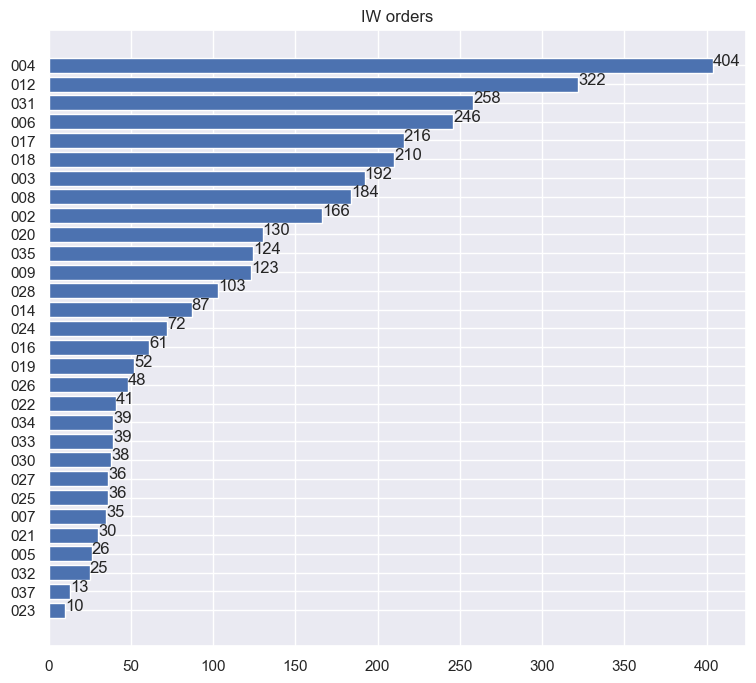

In [149]:
iws=iw.copy()
iws=iws.drop_duplicates(['Repair Order No.'])
plt.figure(figsize=(9,8))
plt.barh(iws['SC Code'].value_counts(ascending=True).index,iws['SC Code'].value_counts(ascending=True).values)
plt.title('IW orders')
for index ,h in enumerate (iws['SC Code'].value_counts(ascending=True)):plt.text(h,index,str(h))


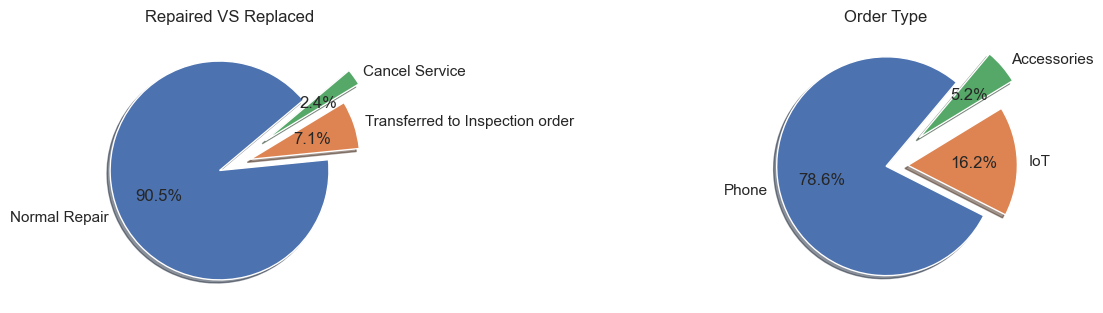

In [150]:
fig = plt.figure(figsize=(12, 8))
p=iws['Handle Method'].value_counts()
plt.subplot(131)
plt.pie(p,labels=p.index,autopct=("%1.1f%%"),startangle=40,explode=[0.1,0.2,0.4],shadow=True)
plt.title('Repaired VS Replaced')

# Order types pie chart
p1=iws['Order Type'].value_counts()
plt.subplot(133)
plt.pie(p1,labels=p1.index,autopct=("%1.1f%%"),startangle=50,explode=[0.0,0.2,0.4],shadow=True)
plt.title('Order Type')

plt.show()

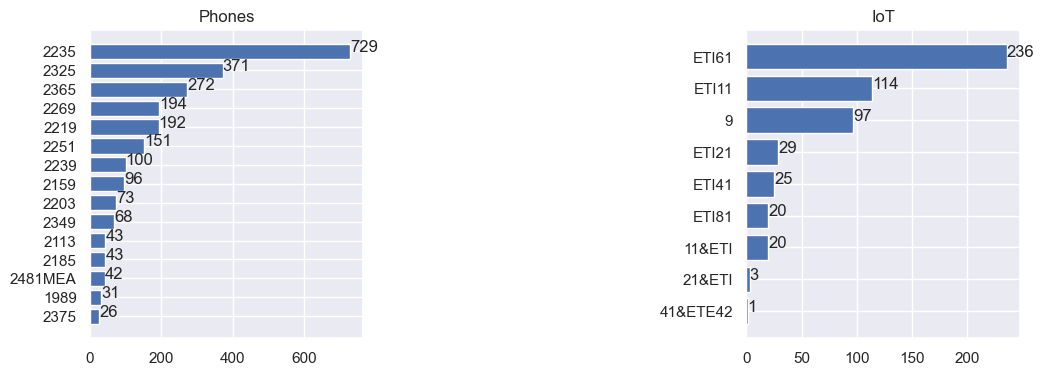

In [151]:
plt.figure(figsize=(12,4))
op=iws[['Internal Model','Order Type','Good Material Subcategory','Repair Order No.']]
op=op.loc[op['Order Type']=='Phone']
op=op['Internal Model'].value_counts(ascending=True).tail(15)
plt.subplot(131)
plt.barh(op.index,op.values)
plt.title('Phones')
for index , value in enumerate (op):plt.text(value,index,str(value))
opt=iws[['Internal Model','Order Type','Good Material Subcategory','Repair Order No.']]
opt=opt.loc[opt['Order Type']=='IoT']
opt=opt['Internal Model'].value_counts(ascending=True).tail(15)
plt.subplot(133)
plt.barh(opt.index,opt.values)
plt.title('IoT')
for index , value in enumerate (opt):plt.text(value,index,str(value))
plt.show()

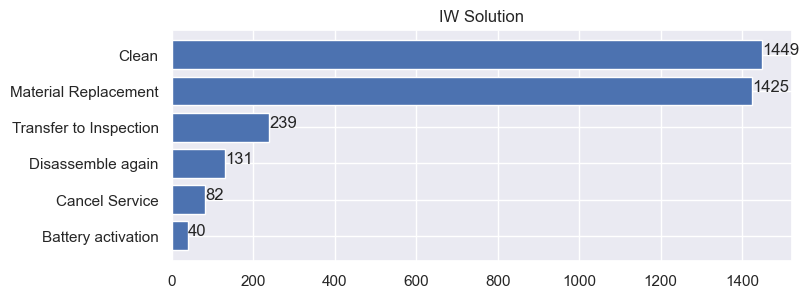

In [152]:
s=iws['Solution'].value_counts(ascending=True)
plt.figure(figsize=(8,3))
plt.barh(s.index,s.values)
plt.title('IW Solution')
for index ,value in enumerate (s):plt.text(value,index,str(value))  

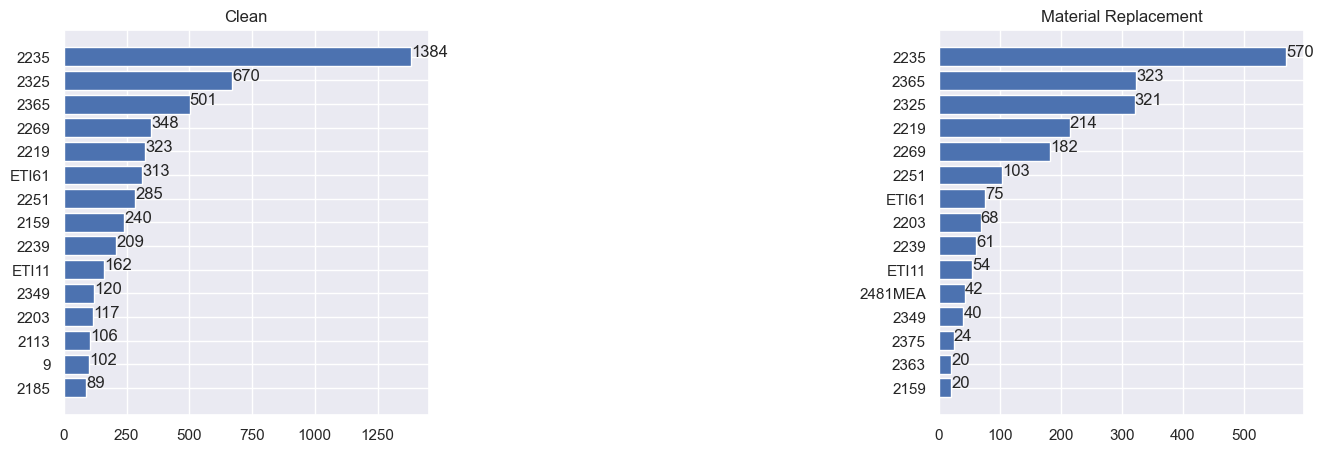

In [153]:
plt.figure(figsize=(16,5))
c=iw[['Internal Model','Solution']]
c.loc[c['Solution']=='Clean']
c=c['Internal Model'].value_counts(ascending=True).tail(15)
plt.subplot(131)
plt.barh(c.index,c.values)
plt.title('Clean')
for index , value in enumerate (c):plt.text(value,index,str(value))
mtt=iw[['Internal Model','Solution']]
mtt=mtt.loc[mtt['Solution']=='Material Replacement']
mtt=mtt['Internal Model'].value_counts(ascending=True).tail(15)
plt.subplot(133)
plt.barh(mtt.index,mtt.values)
plt.title('Material Replacement')
for index , value in enumerate (mtt):plt.text(value,index,str(value))
plt.show()

In [154]:
ai=iw.loc[(iw['Order Type']!='Phone')&(iw['Solution']!='Transfer to Inspection')]
i=ai.loc[ai['Order Type']=='IoT']
i=i[['Repair Order No.','Internal Model','Solution','Good Material Subcategory']]
i=i.drop_duplicates(['Repair Order No.'])
i=i.fillna('Clean')
i=i.loc[i['Good Material Subcategory']!='Clean']


C:\Users\adely\AppData\Local\Temp\ipykernel_5752\3138575543.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=h, y=i1[h] + 5, s=str(i1[h]), ha='center')


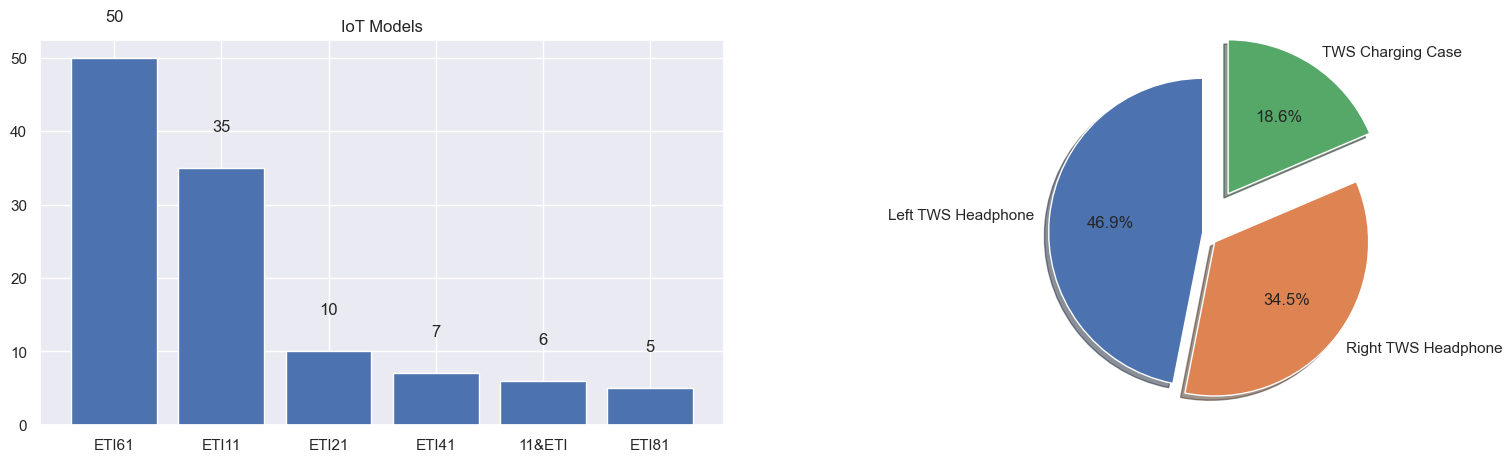

In [155]:
plt.figure(figsize=(30,5))

i1=i['Internal Model'].value_counts()
plt.subplot(132)
plt.bar(i1.index,i1.values)
plt.title('IoT Models')
for h in range(len(i1)):
    plt.text(x=h, y=i1[h] + 5, s=str(i1[h]), ha='center')
plt.subplot(133)
i2=i['Good Material Subcategory'].value_counts()
plt.pie(i2,labels=i2.index,autopct=("%1.1f%%"),explode=[0.0,0.1,0.3],startangle=90,shadow=True)
plt.show()

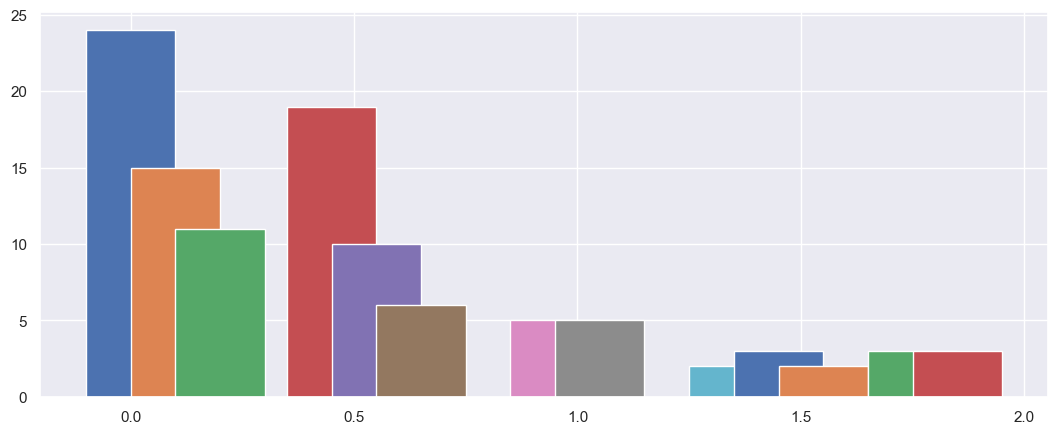

In [156]:
l32=i.loc[(i['Internal Model'] == 'ETI61')&(i['Good Material Subcategory'] == 'Left TWS Headphone')]
l32=l32['Internal Model'].value_counts()
xl32=np.arange(len(l32))
r32=i.loc[(i['Internal Model'] == 'ETI61')&(i['Good Material Subcategory'] == 'Right TWS Headphone')]
r32=r32['Internal Model'].value_counts()
xr32=np.arange(len(r32))
c32=i.loc[(i['Internal Model'] == 'ETI61')&(i['Good Material Subcategory'] == 'TWS Charging Case')]
c32=c32['Internal Model'].value_counts()
xc32=np.arange(len(c32))

l31=i.loc[(i['Internal Model'] == 'ETI11')&(i['Good Material Subcategory'] == 'Left TWS Headphone')]
l31=l31['Internal Model'].value_counts()
xl31=np.arange(len(l31))
r31=i.loc[(i['Internal Model'] == 'ETI11')&(i['Good Material Subcategory'] == 'Right TWS Headphone')]
r31=r31['Internal Model'].value_counts()
xr31=np.arange(len(l31))
c31=i.loc[(i['Internal Model'] == 'ETI11')&(i['Good Material Subcategory'] == 'TWS Charging Case')]
c31=c31['Internal Model'].value_counts()
xc31=np.arange(len(l31))

l51=i.loc[(i['Internal Model'] == 'ETI21')&(i['Good Material Subcategory'] == 'Left TWS Headphone')]
l51=l51['Internal Model'].value_counts()
xl51=np.arange(len(l51))
r51=i.loc[(i['Internal Model'] == 'ETI21')&(i['Good Material Subcategory'] == 'Right TWS Headphone')]
r51=r51['Internal Model'].value_counts()
xr51=np.arange(len(r51))
c51=i.loc[(i['Internal Model'] == 'ETI21')&(i['Good Material Subcategory'] == 'TWS Charging Case')]
c51=c51['Internal Model'].value_counts()
xc51=np.arange(len(c51))

l11=i.loc[(i['Internal Model'] == 'ETI41')&(i['Good Material Subcategory'] == 'Left TWS Headphone')]
l11=l11['Internal Model'].value_counts()
xl11=np.arange(len(l11))
r11=i.loc[(i['Internal Model'] == 'ETI41')&(i['Good Material Subcategory'] == 'Right TWS Headphone')]
r11=r11['Internal Model'].value_counts()
xr11=np.arange(len(r11))
c11=i.loc[(i['Internal Model'] == 'ETI41')&(i['Good Material Subcategory'] == 'TWS Charging Case')]
c11=c11['Internal Model'].value_counts()
xc11=np.arange(len(c11))

l12=i.loc[(i['Internal Model'] == '11&ETI')&(i['Good Material Subcategory'] == 'Left TWS Headphone')]
l12=l12['Internal Model'].value_counts()
xl12=np.arange(len(l12))
r12=i.loc[(i['Internal Model'] == '11&ETI')&(i['Good Material Subcategory'] == 'Right TWS Headphone')]
r12=r12['Internal Model'].value_counts()
xr12=np.arange(len(r12))
c12=i.loc[(i['Internal Model'] == '11&ETI')&(i['Good Material Subcategory'] == 'TWS Charging Case')]
c12=c12['Internal Model'].value_counts()
xc12=np.arange(len(c12))

plt.figure(figsize=(13,5))
plt.bar(xl32,l32,width=0.2,label='l32')
plt.bar(xr32+0.1,r32,width=0.2,label='r32')
plt.bar(xc32+0.2,c32,width=0.2,label='c32')

plt.bar(xl31+0.45,l31,width=0.2,label='l31')
plt.bar(xr31+0.55,r31,width=0.2,label='r31')
plt.bar(xc31+0.65,c31,width=0.2,label='c31')

plt.bar(xl51+0.95,l51,width=0.2,label='l51')
plt.bar(xr51+1.05,r51,width=0.2,label='r51')
plt.bar(xc51+1.15,c51,width=0.2,label='c51')

plt.bar(xl11+1.35,l11,width=0.2,label='l11')
plt.bar(xr11+1.45,r11,width=0.2,label='r11')
plt.bar(xc11+1.55,c11,width=0.2,label='c11')

plt.bar(xl12+1.75,l12,width=0.2,label='l12')
plt.bar(xr12+1.85,r12,width=0.2,label='r12')
plt.bar(xc12+1.95,c12,width=0.2,label='c12')

plt.show()

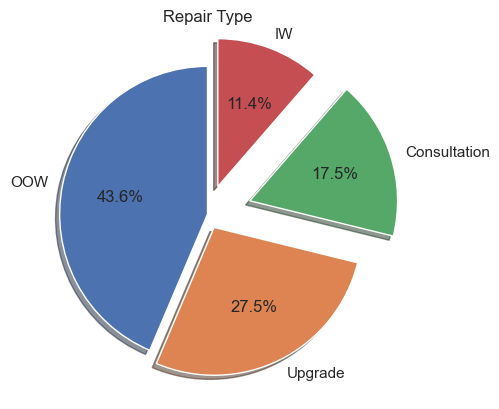

In [157]:
mp=mm.drop_duplicates(['Repair Order No.'])
mp=mm['Repair type'].value_counts()
plt.pie(mp,labels=mp.index,autopct=("%1.1f%%"),explode=[0.0,0.1,0.3,0.2],startangle=90,shadow=True)
plt.title('Repair Type')
plt.show()


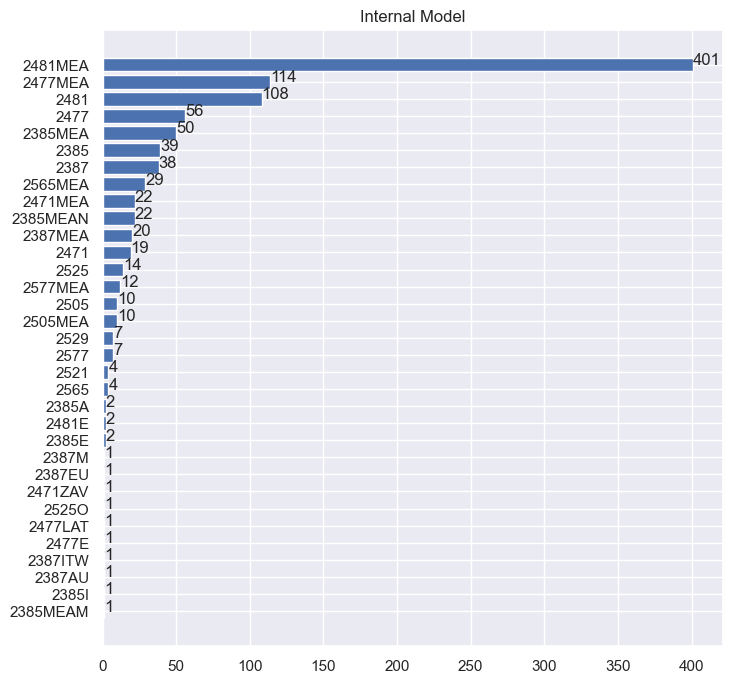

In [159]:

mt=mm['Internal Model'].value_counts(ascending=True)
plt.figure(figsize=(8,8))
plt.barh(mt.index,mt.values)
for index , value in enumerate(mt):plt.text(value,index,str(value))  
plt.title('Internal Model')
plt.show()


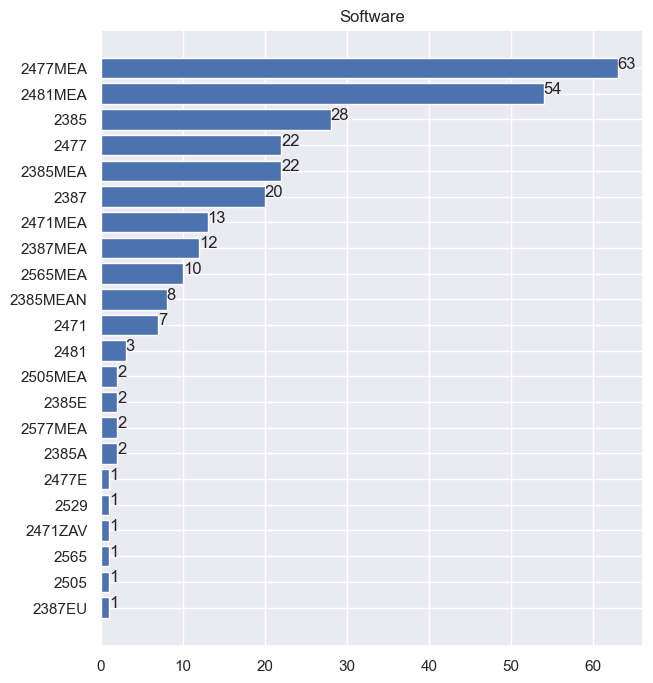

In [160]:
up=mm.loc[mm['Repair type']=='Upgrade']
up=up['Internal Model'].value_counts(ascending=True)
plt.figure(figsize=(7,8))
plt.barh(up.index,up.values)
plt.title('Software')
for index , value in enumerate (up):plt.text(value,index,str(value))



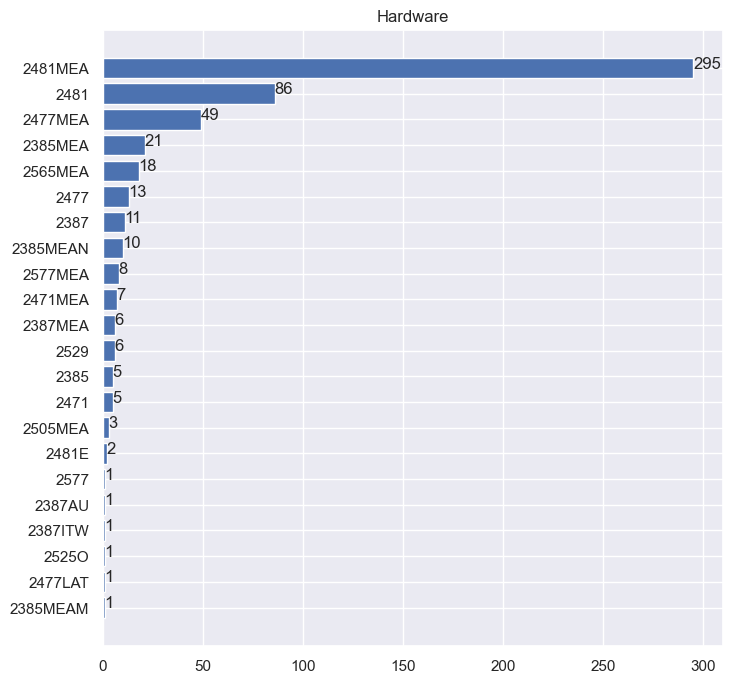

In [163]:
hw=mm.loc[(mm['Repair type']=='IW')| (mm['Repair type']=='OOW' )]
hw=hw['Internal Model'].value_counts(ascending=True)
plt.figure(figsize=(8,8))
plt.barh(hw.index,hw.values)
plt.title('Hardware')
for index , value in enumerate (hw):plt.text(value,index,str(value))

In [165]:
iw=mm.loc[mm['Repair type']=='IW']
iw=iw[['Internal Model','Solution','Repair type']]
pd.pivot_table(iw,index='Internal Model',columns='Solution',aggfunc="count",margins=True)

Repair type                                               \
Solution       Cancel Service Clean Disassemble again Material Replacement   
Internal Model                                                               
2385MEA                   1.0   1.0               NaN                  NaN   
2387MEA                   NaN   NaN               3.0                  NaN   
2477MEA                   1.0   8.0               NaN                  NaN   
2481                      1.0   6.0               1.0                 14.0   
2481E                     NaN   NaN               1.0                  NaN   
2481MEA                   2.0  23.0               6.0                 42.0   
2565MEA                   NaN   4.0               NaN                  NaN   
All                       5.0  42.0              11.0                 56.0   

                     
Solution        All  
Internal Model       
2385MEA           2  
2387MEA           3  
2477MEA           9  
2481             22  
2481E             1  
2481MEA          73  
2565MEA           4  
All             114

In [166]:
oow=mm.loc[mm['Repair type']=='OOW']
oow=oow[['Repair type','Internal Model','Good Material Subcategory']]
oow.pivot_table(index='Internal Model',columns='Good Material Subcategory',aggfunc='count',margins=True)

Repair type                              \
Good Material Subcategory Auxiliary Material Backcover  FPC Middle Frame   
Internal Model                                                             
2385MEA                                  2.0       NaN  NaN          NaN   
2385MEAN                                 3.0       NaN  NaN          NaN   
2477                                     NaN       NaN  NaN          NaN   
2477MEA                                  2.0       NaN  NaN          NaN   
2481                                    21.0       NaN  1.0          1.0   
2481E                                    NaN       NaN  NaN          NaN   
2481MEA                                 61.0       1.0  2.0          NaN   
All                                     89.0       1.0  3.0          1.0   

                                                                       
Good Material Subcategory Protective Film SIM Card Holder Screen  All  
Internal Model                                                         
2385MEA                               1.0             NaN    1.0    4  
2385MEAN                              NaN             NaN    NaN    3  
2477                                  1.0             NaN    NaN    1  
2477MEA                               1.0             NaN    NaN    3  
2481                                  NaN             NaN   29.0   52  
2481E                                 NaN             NaN    1.0    1  
2481MEA                               NaN             1.0   99.0  164  
All                                   3.0             1.0  130.0  228

In [167]:
uct=uc[['Repair Order No.','Repair type','Internal Model']]
uct=uct.loc[(uc['Repair type']!='Consultation')&(uc['Solution']!='Transfer to Inspection')]
uct=uct.pivot_table(index='Internal Model',columns='Repair type',aggfunc='count',margins=True)
pd.set_option('display.max_rows',300)
uct.columns=uct.columns.droplevel(0)
uct=uct[:-1]
uct=uct.sort_values(by='OOW',ascending=False)
uct.head(15)

Repair type,IW,IW&OOW,OOW,Upgrade,All
Internal Model,,,,,
2235,810.0,NaN,4089.0,715.0,5614
2159,220.0,NaN,3717.0,513.0,4450
2113,98.0,NaN,2248.0,258.0,2604
1989,86.0,1.0,1903.0,374.0,2364
2239,148.0,NaN,1645.0,724.0,2517
2185,80.0,NaN,1644.0,1365.0,3089
2043,29.0,NaN,1475.0,219.0,1723
2121,40.0,NaN,1286.0,241.0,1567
2095,40.0,NaN,1093.0,296.0,1429


In [168]:

mr=mr[['Repair Order No.','Internal Model','Good Material Subcategory']]
mrr=mr.pivot_table(index=['Internal Model','Good Material Subcategory'],aggfunc='count')
mrr=mrr.sort_values(by='Repair Order No.',ascending=False)
mrr.head(15)

,,Repair Order No.
Internal Model,Good Material Subcategory,
2159,Screen,4503
2235,Screen,3030
2159,Auxiliary Material,2977
2113,Screen,2609
2235,Auxiliary Material,1946
2095,Screen,1643
2043,Screen,1640
2113,Auxiliary Material,1524
2121,Screen,1425


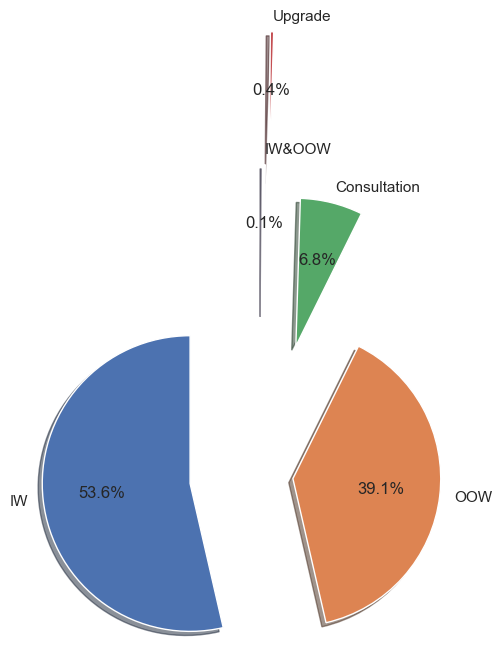

In [169]:
ii=io.loc[io['Handle Method']=='Normal Repair']
ii=io['Repair type'].value_counts()
plt.pie(ii,startangle=90,labels=ii.index,autopct=("%1.1f%%"),explode=[0.5,0.2,0.9,2.0,1.1],shadow=True)
plt.show()


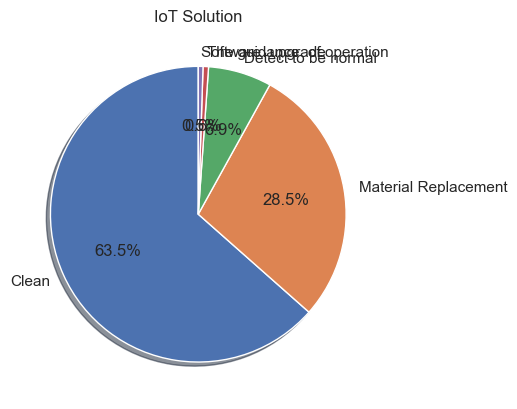

In [170]:
ioo=io.loc[io['Handle Method']=='Normal Repair']
ioo=ioo['Solution'].value_counts()
plt.title('IoT Solution')
plt.pie(ioo,startangle=90,labels=ioo.index,autopct=("%1.1f%%"),shadow=True)
plt.show()


In [176]:

iio=io[['Repair Order No.','Internal Model','Solution']]
iio.pivot_table(index='Internal Model',columns='Solution',aggfunc='count',margins=True)

Repair Order No.                             \
Solution         Cancel Service  Clean Detect to be normal   
Internal Model                                               
11&ETI                     12.0   32.0                 1.0   
21&ETI                     10.0    3.0                 NaN   
2269                        NaN    NaN                 NaN   
2325                        1.0    NaN                 NaN   
2349                        NaN    NaN                 NaN   
2365                        NaN    NaN                 NaN   
31&ETE32                    NaN    8.0                 NaN   
41&ETE42                    NaN   12.0                 NaN   
9                          13.0    NaN                15.0   
9W6                         1.0    NaN                 NaN   
ETI11                      36.0  103.0                 9.0   
ETI21                      38.0   42.0                 1.0   
ETI41                      15.0   52.0                 3.0   
ETI61                      34.0  447.0                38.0   
ETI81                       2.0   33.0                 6.0   
All                       162.0  732.0                73.0   

                                                       \
Solution       Material Replacement Software  upgrade   
Internal Model                                          
11&ETI                          9.0               NaN   
21&ETI                          NaN               NaN   
2269                            1.0               NaN   
2325                            NaN               NaN   
2349                            1.0               NaN   
2365                            1.0               NaN   
31&ETE32                        NaN               NaN   
41&ETE42                        NaN               NaN   
9                               NaN               2.0   
9W6                             NaN               1.0   
ETI11                          54.0               NaN   
ETI21                          13.0               NaN   
ETI41                           8.0               NaN   
ETI61                          78.0               3.0   
ETI81                           7.0               NaN   
All                           172.0               6.0   

                                                                        
Solution       The guidance  of operation Transfer to Inspection   All  
Internal Model                                                          
11&ETI                                NaN                   12.0    66  
21&ETI                                NaN                    3.0    16  
2269                                  NaN                    NaN     1  
2325                                  NaN                    NaN     1  
2349                                  NaN                    NaN     1  
2365                                  NaN                    NaN     1  
31&ETE32                              NaN                    NaN     8  
41&ETE42                              NaN                    NaN    12  
9                                     1.0                  103.0   134  
9W6                                   NaN                    1.0     3  
ETI11                                 2.0                   76.0   280  
ETI21                                 NaN                   24.0   118  
ETI41                                 NaN                   11.0    89  
ETI61                                 4.0                   56.0   660  
ETI81                                 NaN                    4.0    52  
All                                   7.0                  290.0  1442

In [181]:
cs['Cancelling Cause'].value_counts()

Cancelling Cause
Others                                                                            3066
Spare parts are too expensive                                                     2592
The user does not approve the test results and the original device is returned     985
Out of stock                                                                       895
The maintenance time is expected to be long. The user doesn't want to wait         317
There is data in the device, it will not be processed temporarily                   78
Can't contact the user                                                              52
User does not want to repair the phone                                              18
Name: count, dtype: int64

In [ ]:
with pd.ExcelWriter('C:Desktop/Important/Reports/Full Project/FullProject.xlsx') as w:
    iw.to_excel(w,sheet_name='IW')
    oow.to_excel(w,sheet_name='OOW')
    mm.to_excel(w,sheet_name='MM')
    uc.to_excel(w,sheet_name='UC')
    mr.to_excel(w,sheet_name='MR')
    sc.to_excel(w,sheet_name='SC')
    ts.to_excel(w,sheet_name='TS')
    cs.to_excel(w,sheet_name='CS')